# IPL analysis storyline #

Importing pandas and matplotlib

In [248]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Reading the csv files

In [249]:
deliveries = pd.read_csv('/home/user/Downloads/deliveries.csv')
matches = pd.read_csv('/home/user/Downloads/matches.csv')

Renaming the common attribute of one file, followed by merging

In [250]:
delivery = deliveries.rename(columns={'match_id': 'id'})

p_totalfile  = pd.merge(matches, delivery, on = 'id')

## Part 1: Analysis of total number of runs scored and the total runs scored by boundaries ##

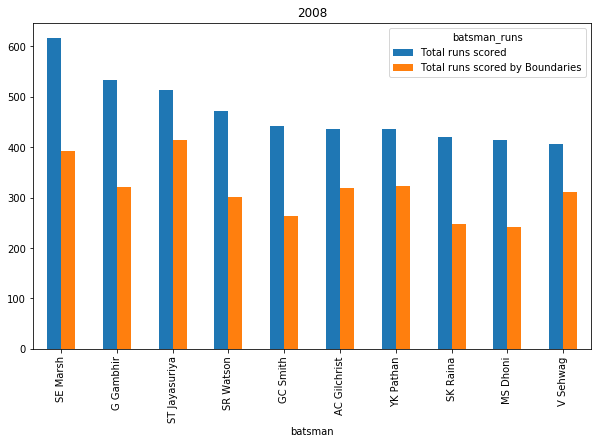

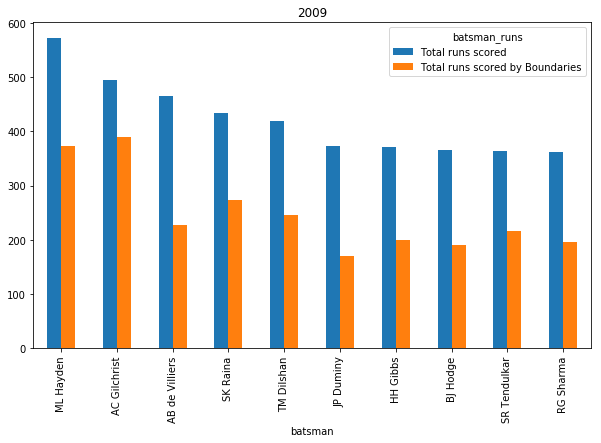

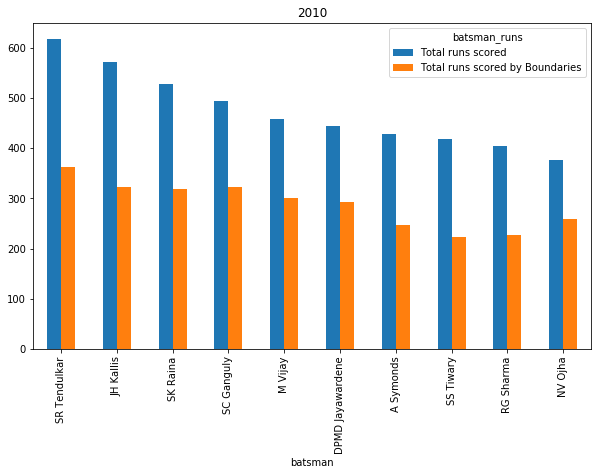

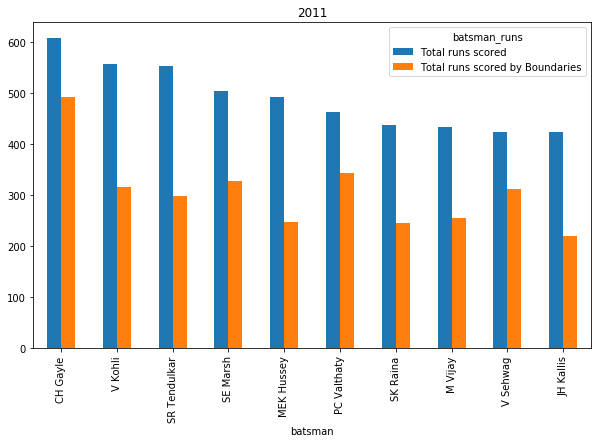

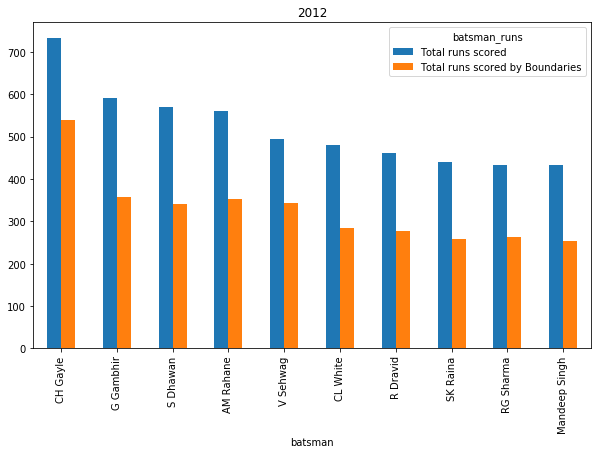

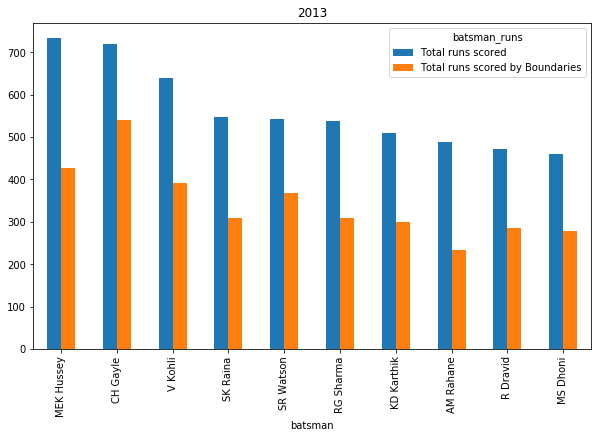

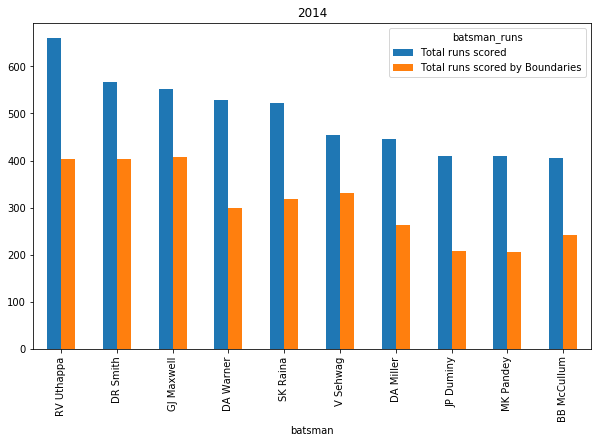

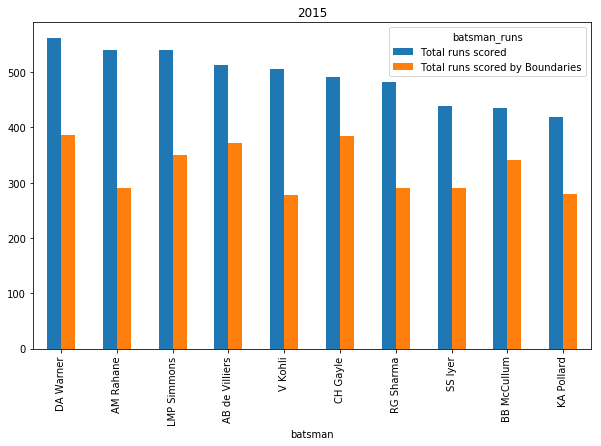

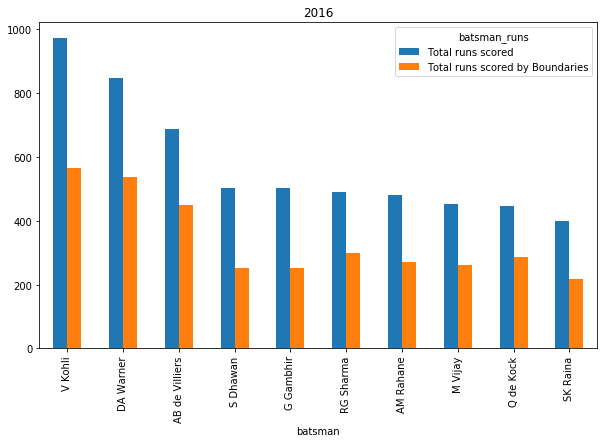

In [269]:
for season in range (2008, 2017):
    p_total_file  = p_totalfile.groupby(['season']).get_group(season)
    batsman_runns = pd.crosstab(p_total_file.batsman, p_total_file.batsman_runs)
    
    summ = []
    for i in batsman_runns.index:
        runs = (batsman_runns.loc[i,:]*batsman_runns.columns).sum(axis = 0)
        summ.append(runs)
    
    batsman_runns['Total runs scored'] = summ 
    batsman_runns_sorted = batsman_runns.sort_values('Total runs scored', ascending= False)
    highestruns = batsman_runns_sorted.iloc[0:10, :]
    highestrun = pd.DataFrame(highestruns.loc[:, 'Total runs scored'])
    n = batsman_runns.drop(['Total runs scored',0, 1, 2, 3, 5], axis = 1)
    
    summ = []
    for i in n.index:
        runs = (n.loc[i,:]*n.columns).sum(axis = 0)
        summ.append(runs)
    
    batsman_runns['Total runs scored by Boundaries']  = summ
    lm = batsman_runns.sort_values('Total runs scored',ascending=False).drop([4,6,0, 1, 2, 3, 5], axis = 1).iloc[0:10, :]
    
    lm.plot(kind ='bar', figsize = (10,6))
    plt.title(season)
    plt.show()

## Part 2: Analysis of the number of boundaries hit in a venue ##

Selecting venue and boundaries hit using crosstab

In [255]:
venue_boundaries = pd.crosstab(p_totalfile.venue, p_totalfile.batsman_runs)
venue_boundaries = venue_boundaries.drop([0,1,2,3,5], axis = 1)

Summing the 4's and 6's and sorting by descending order

In [256]:
venue_boundaries['Sum'] = venue_boundaries[4] + venue_boundaries[6]
venue_boundaries = venue_boundaries.sort_values('Sum', ascending = False)

Selecting the number of matches played on a venue

In [257]:
season_vene = matches['venue'].value_counts()
season_vene
venue = []
no_of_matches = []
for i in season_vene.iteritems():
    venue.append(i[0])
    no_of_matches.append(i[1])

venue_matches = pd.DataFrame({'Venue':venue,'No_of_matches':no_of_matches})

Making the necessary DataFrames

In [258]:
venue_boundaries = pd.DataFrame({'No_of_matches':no_of_matches,'Boundaries':venue_boundaries.Sum}).iloc[0:10, :]

venue_boundaries['Avg'] = venue_boundaries['Boundaries']/venue_boundaries['No_of_matches']
venue_avg = venue_boundaries.drop(['Boundaries', 'No_of_matches'], axis = 1)
venue_bound = venue_boundaries.drop(['Avg', 'No_of_matches'], axis = 1)
venue_match = venue_boundaries.drop(['Avg', 'Boundaries'], axis = 1)

The number of boundaries hit by matches played in a particular venue has little deviation

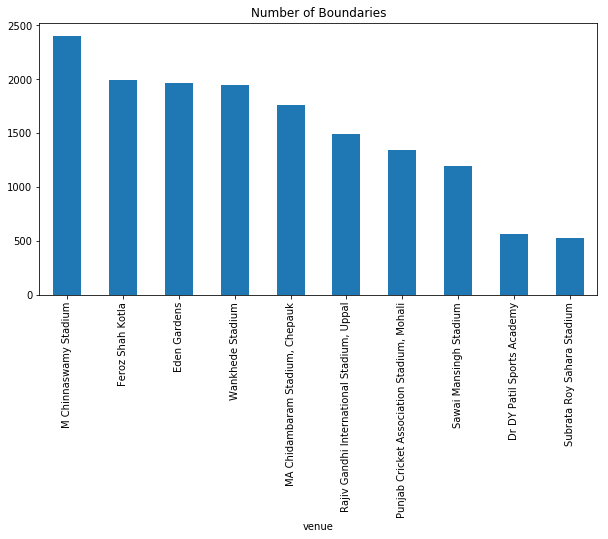

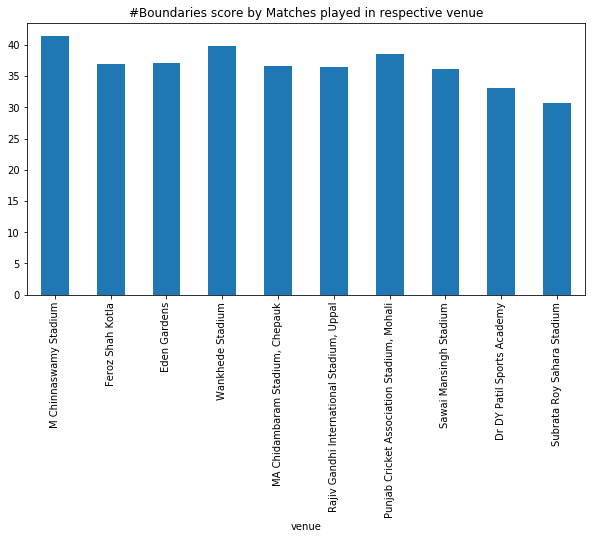

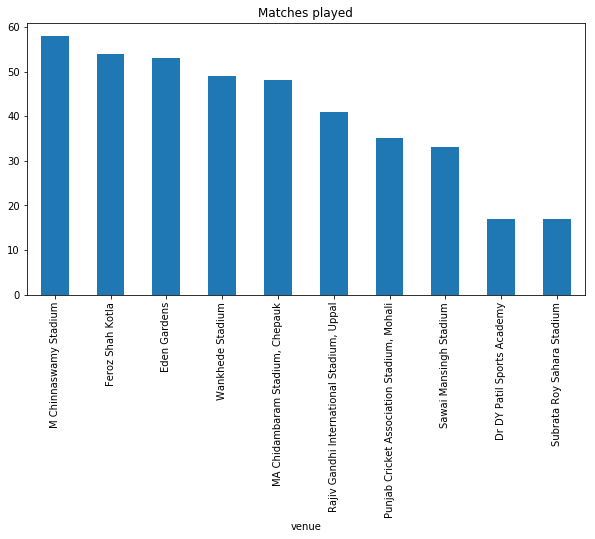

In [259]:
venue_bound.plot(kind =  'bar', figsize = (10,5), legend = False, title = 'Number of Boundaries')
venue_avg.plot(kind =  'bar', figsize = (10,5), legend = False, title = '#Boundaries score by Matches played in respective venue')
venue_match.plot(kind =  'bar', figsize = (10,5), legend = False, title = 'Matches played')
plt.show()

## Part 3: Survey of  toss winner and match winner ## 

Dataframe of a team which is a toss winner and match winner as well

In [260]:
winner = matches[matches.toss_winner==matches.winner]
win_toss = winner['toss_winner'].value_counts()
df1 = pd.DataFrame({'Toss with match won':win_toss})


Dataframe of a team winner 

In [261]:
match_winner = matches['winner'].value_counts()

df2 = pd.DataFrame({'Total matches won':match_winner})


Merger of both dataframes

In [265]:
df3 = pd.concat([df2, df1], axis = 1)

Plot 

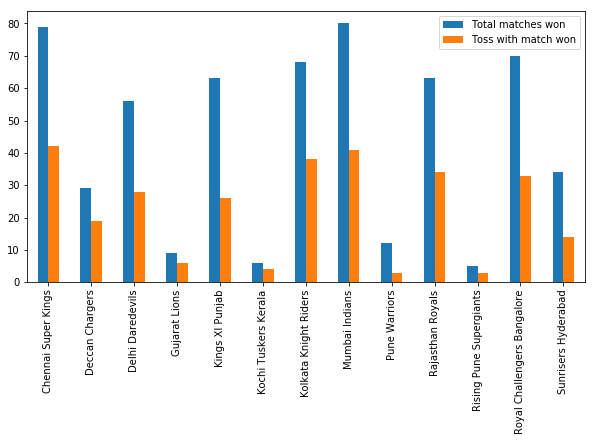

In [266]:
df3.plot(kind= 'bar', figsize=(10,5))
plt.show()